In [1]:
# pip install nltk

In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv('data.csv', dtype='unicode')

In [3]:
# data.head()

In [4]:
# data.info()

In [5]:
# data.isnull().sum()

In [6]:
missing_values = ["na","N/a",np.nan]
df= pd.read_csv('data.csv',na_values=missing_values,dtype='unicode')

In [7]:
# data.isnull().sum()

In [8]:
to_drop = ['company_description','duplicate_status','contact_email']
df.drop(to_drop, inplace=True, axis=1)

In [9]:
# df.info()

In [10]:
data["job_title"].value_counts().head()

Retail Merchandiser           375
Amazon Picker/Packer          206
Amazon Warehouse Worker       197
Amazon Order Picker           195
Amazon Warehouse Associate    175
Name: job_title, dtype: int64

### Which job title was posted the most times?      
Retail Merchandiser 375

In [11]:
data["company_name"].value_counts().head()

Amazon Fulfillment         7501
GPAC                        924
LanguageLine Solutions      872
Lowe's Home Improvement     861
CDL Career Now              545
Name: company_name, dtype: int64

### Which company posted the most amount of jobs?  
    Amazon Fulfillment 7501

In [12]:
data.groupby("company_name")["post_date"].count().sort_values(ascending = False).head()

company_name
Amazon Fulfillment         7501
GPAC                        924
LanguageLine Solutions      872
Lowe's Home Improvement     861
CDL Career Now              545
Name: post_date, dtype: int64

### Which city offered the most jobs?

In [13]:
data.groupby("city")["post_date"].count().sort_values(ascending = False).head()

city
Boston        262
Chicago       218
Charlotte     216
Cincinnati    212
Portland      211
Name: post_date, dtype: int64

### Ans : Boston 262

### Which state offered the most jobs?

In [168]:
data.groupby("inferred_state")["post_date"].count().sort_values(ascending = False).head()

inferred_state
California       2771
New jersey       1862
Massachusetts    1688
Pennsylvania     1599
Texas            1593
Name: post_date, dtype: int64

### Ans : California 2771

<AxesSubplot:>

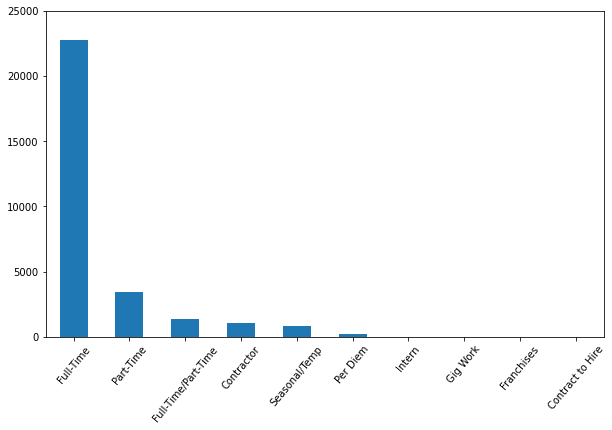

In [131]:
df = data['job_type'].value_counts()
df
df.plot(kind='bar',figsize=(10,6),rot=50, ylim=(0,25000))

In [134]:
import datetime
# data['post_date'][1]
data['month']=""
for i in range(0,29983):
    datee = datetime.datetime.strptime(data['post_date'][i], "%d-%m-%Y")
    if datee.month==3:
        data['month'][i] = 'March'
    if datee.month==4:
        data['month'][i] = 'April'
    if datee.month==5:
        data['month'][i] = 'May'
    if datee.month==6:
        data['month'][i] = 'June'


<AxesSubplot:xlabel='month'>

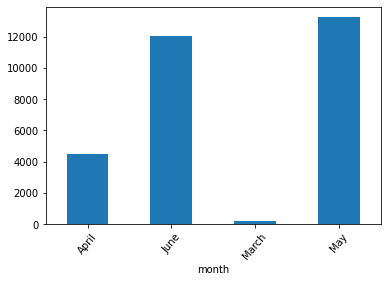

In [135]:
df = data.groupby("month")['post_date'].count()
df.plot(kind='bar',rot=50)

<AxesSubplot:ylabel='post_date'>

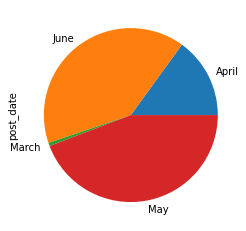

In [136]:
df.plot(kind='pie')

In [6]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
init_notebook_mode(connected = True)

In [7]:
state_post = data.groupby("state")["post_date"].count()
state_names_list = []
post_dates_count = []
for i,j in state_post.items():
    state_names_list.append(i)
    post_dates_count.append(j)
    
states_fname = data.groupby("inferred_state")["post_date"].count()
text=[]
for i,j in states_fname.items():
    text.append(i)

In [8]:
g_data = dict(type = 'choropleth',
            locations = state_names_list,
            locationmode = 'USA-states',
            colorscale = 'Reds',
            text = text,
            z = post_dates_count,
            colorbar = {'title': 'Post_dates count'})
              
layout = dict(geo ={'scope': 'usa'})

choromap = go.Figure(data = [g_data], layout = layout)
choromap.update_layout(title_text='StateWise Jobs Post date count plot')
# plotting graph
iplot(choromap)  

In [ ]:
# import nltk
# nltk.download('stopwords')

In [ ]:
# from nltk.corpus import stopwords
# stop = stopwords.words('english')

# sw_list = ['Amazon','Full','Time','Morning','Part','-','Earn', 'Registered','$15/hr','OR',
#            '(Non-DOT)/Part Time/PM Shift/Sunday 6:00PM-11:30PM/Monday','through','Friday', '6:30PM-11:30PM/$13.26',
#            'per', 'hour','Shifts','Available','Temporary','ICU', '13', 'Week', 'Contract',
#            'Work', 'From', 'Home', 'Position', 'Hiring', 'ASAP!!!','Full-Time','PART-TIME','U-Haul','Moving','Center']
# stop.extend(sw_list)
# data['corrected_title']=""
# data['corrected_title'] = data['job_title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
# data['corrected_title']
# data.to_csv('data.csv',index=False)

In [ ]:
# data = pd.read_csv('data.csv', dtype='unicode')
# data.head()
